### *Este notebook es para la actividad en clase que se entrega el 10 de Febrero ya que yo no estaba presente, en el siguiente notebook se utilizan diferentes tecnicas para hacer exploratory analysis y preprocesamiento de los datos, al final implementamos un modeloo predictivo*

El dataset que implementamos es el pima indians para clasificar el diabetes tipo 2 de kaggle, todos los pacientes son mujeres menores de 21 anos de una descendencia Pima Indian, tenemos 9 columnas entre ellas Outcome que es el target donde tenemos si es diabetes o no. 

Fuente del dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [21]:
# Hacemos todos los imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
# Cargamos el datasets pima indian diabetes que ya esta en el repo 
# Y empezamos a hacer un EDA para ver las columnas

dataset = pd.read_csv("datasets/diabetes.csv")

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Utilizamos describe para mirar los valores avg de las columnas
# E ir pintando el panorama del dataset

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


De una vez podemos identificar outliers sin la necesidad de graficar, ya que en la columna de pregnancies tengo un valor max de 17 embarazos y el promedio son 4 entonces definitivamente es un outlier, igual con Insulina, etc.

In [4]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

La ventaja de nuestro dataset es que tenemos puras features numericas y tambien no hay valores nulos entonces ya no tenemos que hacer handle de valores que estan missing

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Mi problema tiene puros valores numericos entonces no hara falta encodear los features de string

In [6]:
# Primero definimos el subset X y Y porque si no no podemos graficar
# Ya que no hay variables X ni variable target

y = dataset['Outcome']
X = dataset.drop(['Outcome'], axis=1)

In [7]:
# Las columnas que despues utilizaremos para predicciones

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
# La columna que utilizaremos para el outcome como Y val y Y train

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

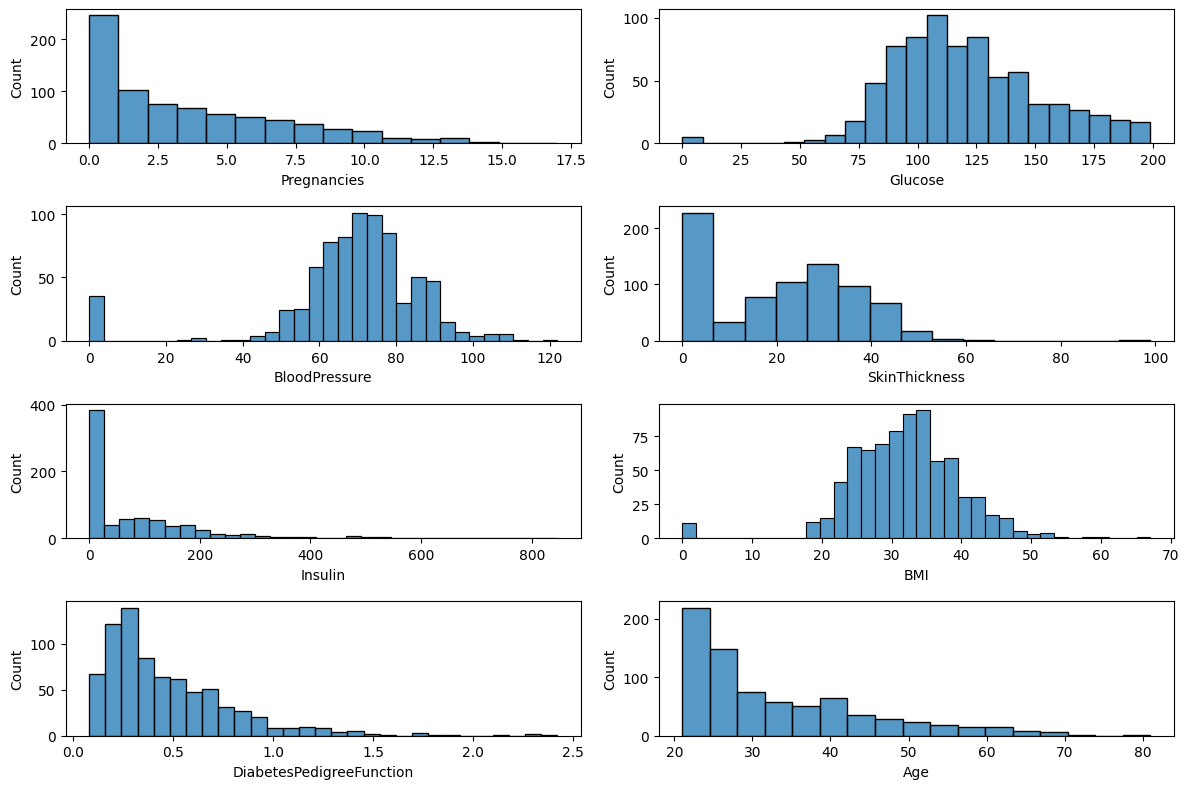

In [ ]:
# Graficamos varios histoplots para poder ver si existen outliers

fig, ax = plt.subplots(4,2, figsize=(12,8))

for ax, col in zip(ax.ravel(), X.columns):
    sns.histplot(X[col], ax=ax)

fig.tight_layout()

<Axes: xlabel='Outcome', ylabel='Count'>

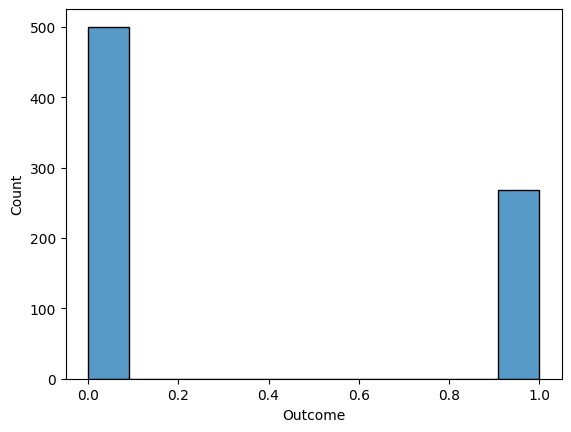

In [10]:
# Graficamos el outcome para darnos una idea 
# de que tan sampleadas estan las 2 clases

sns.histplot(y)

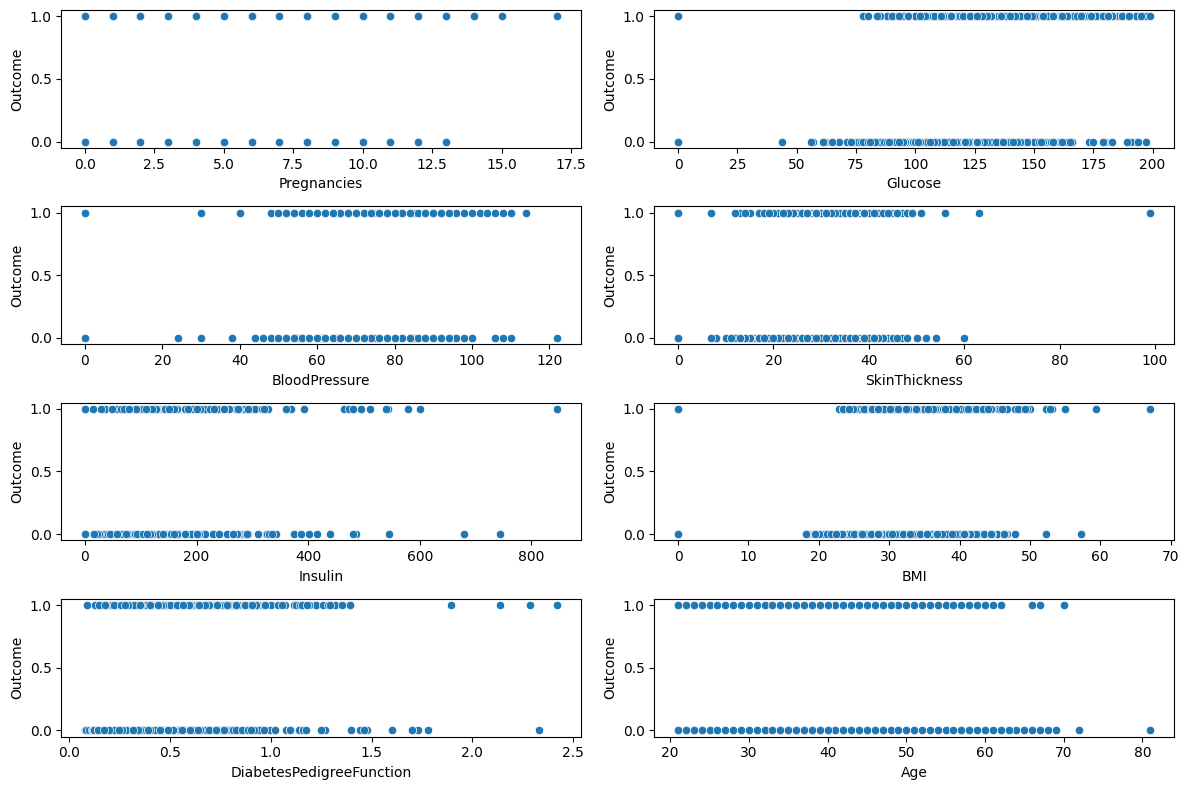

In [11]:
# Grafico un scatterplot para poder identificar los outliers en base
# A la columna target

fig, ax = plt.subplots(4,2, figsize=(12,8))

for ax, col in zip(ax.ravel(), X.columns):
    sns.scatterplot(x= X[col], y=y, ax=ax)

fig.tight_layout()

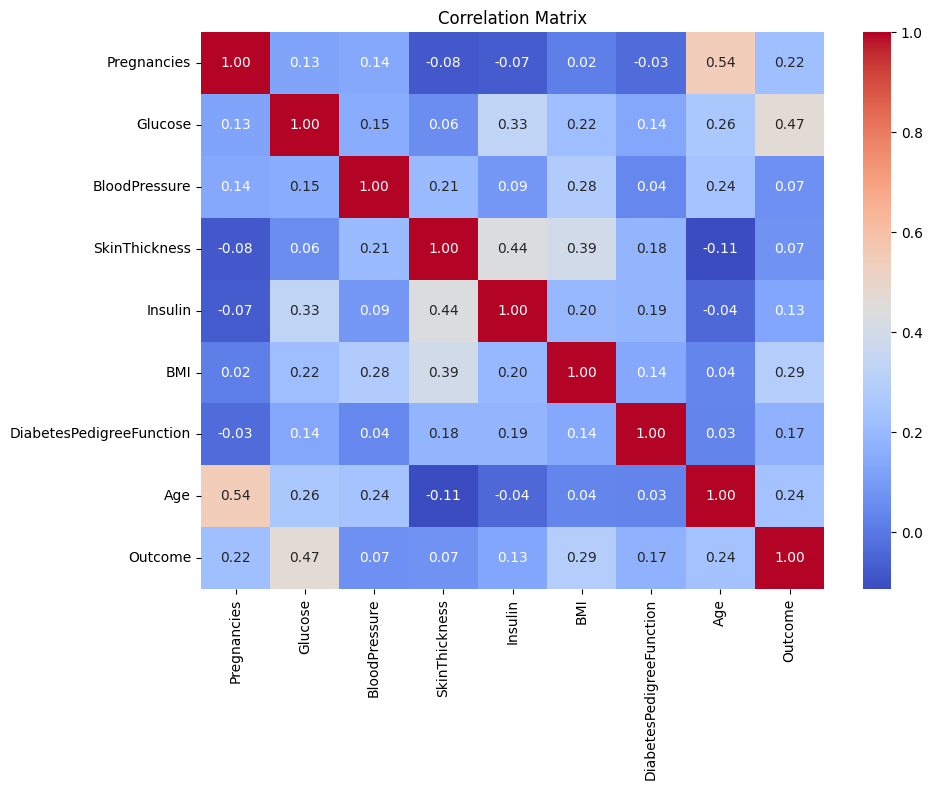

In [ ]:
# Creamos una matriz de correlacion para poder ver la correlacion de los features con el outcome

corr = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [ ]:
dataset.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Podemos ver que skin thickness y bloodpressure casi no tienen correlacion con el outcome: 0.07

### Para este problema vamos a utilizar todas las columnas ya que aunque hay algunas que no tienen tanta correlacion vamos a tratar de aprovechar todas para poder ver si el modelo puede reconocer algun tipo de pattern de las columnas. Por otra parte, el dataset esta muy balanceado pero definitivamente existen outliers muy fuertes entonces los vamos a eliminar, para la parte de missing values y valores nulos no existen en este dataset entonces no hubo necesidad de handlear esos. Y basicamente nuestro problema actualmente es detectar el diabetes tipo 2 en personas femeninas menores de 21 anos con este dataset numerico

In [14]:
# Implementamos los subsets para train y test 
# con random state 42 para reproducibilidad

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
# Utilizar IQR para poder remover outliers de manera eficiente
# Aplicamos IQR solamente para los datos de entrenamiento, como la identificacion
# de diabetes es un problema medico, no creo que remover outliers sea lo
# mejor ya que son datos reales de medicina pero por el objetivo de la 
# actividad los voy a remover.
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

X_train_capped = X_train.copy()
X_test_capped = X_test.copy()

for col in X_train.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    X_train_capped[col] = X_train[col].clip(lower = lower_bound, upper = upper_bound)
    X_test_capped[col] = X_test[col].clip(lower = lower_bound, upper = upper_bound)

X_train = X_train_capped 
X_test = X_test_capped 



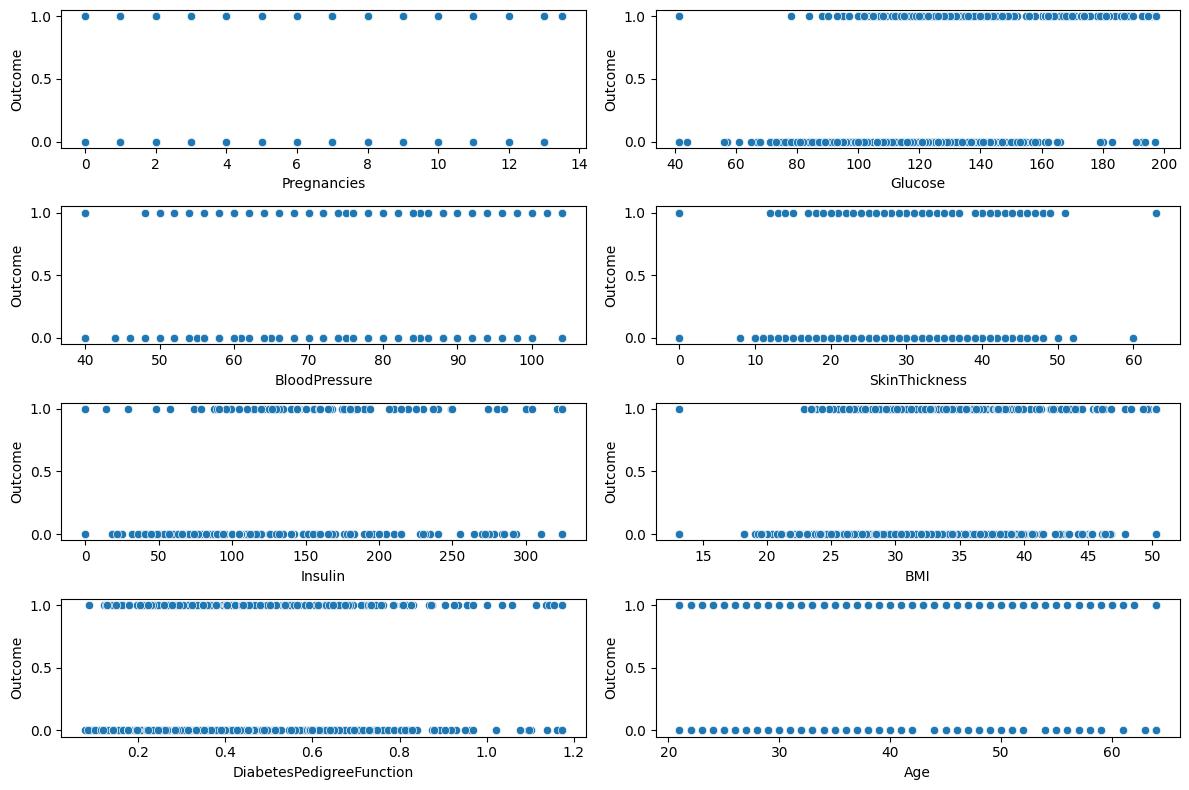

In [16]:
# Grafico otra vez el scatterplot para poder identificar 
# si removi bien los outliers para el set de entrenamiento

fig, ax = plt.subplots(4,2, figsize=(12,8))

for ax, col in zip(ax.ravel(), X.columns):
    sns.scatterplot(x=X_train[col], y=y, ax=ax)

fig.tight_layout()

Podemos ver que si removimos super bien los outliers mas en el caso de la Insulina que el cap era 800 y ahora es 300, o pregnancies que redujo de 17.5 a 14 , tambien para el lowerbound blood pressure se vio beneficiado al subir de 0 a 40 donde ya hay mas informacion, en general satisfecho con el resultado yo creo que ya se pueden realizar los .fit del modelo

Nuestro pipeleine de preprocesamiento sera un MinMaxScaler, ya que tenemos features con numeros super grandes a diferencias de otros, por ejemplo, aunque removimos outliers tenemos un valor numerico de 300 en la columna de Insulina, mientras en la columna DiabetesPedigreeFunction tenemos un valor maximo numerico de 1.2 , Este rango de diferencia es alto y no quiero que nos afecte por lo que aplicare un preprocesamiento de escalamiento min max donde todos los features se reduciran sus valores a una escala de 0 a 1 para que todo sea mas parejo

In [17]:
# Creamos un pipeline que incluye el preprocesamiiento de MinMaxScaler 
# Y el modelo donde mismo

pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model",  LogisticRegression())
])

pipeline.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L

In [18]:
# Creamos una funcion universal para evaluar el modelo con las
# diferentes metricas para no tener que estar sobreescribiendo codigo

def evaluate_model(model, x, y):
    y_pred = model.predict(x)

    Accuracy = accuracy_score(y, y_pred),
    Precision = precision_score(y, y_pred, zero_division=0),
    Recall = recall_score(y, y_pred, zero_division=0),
    F1 = f1_score(y, y_pred, zero_division=0),

    return { 
        'Accuracy': Accuracy,
        'Precision' : Precision,
        'Recall' : Recall,
        'F1' : F1

    }


In [19]:
train_metrics = evaluate_model(pipeline, X_train, y_train)
print(train_metrics)


{'Accuracy': (0.762214983713355,), 'Precision': (0.7161290322580646,), 'Recall': (0.5211267605633803,), 'F1': (0.6032608695652174,)}


In [20]:
test_metrics = evaluate_model(pipeline, X_test, y_test)
print(test_metrics)


{'Accuracy': (0.7597402597402597,), 'Precision': (0.6730769230769231,), 'Recall': (0.6363636363636364,), 'F1': (0.6542056074766355,)}
